# Titanic Survival Analysis 
#### by Correy Ananta: https://github.com/correyananta/titanic_machine_learning

In this chapter, I use the legendary dataset for many data analyst. Here, the Titanic dataset as the features were built by machine learning calculation. This dataset was collected from Kaggle. For the begining, let me introduce the path of the project:

1. Exploratory Data Analysis
2. Feature Engineering
3. Developing the Predictive Model using Machine Learning

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. For the information and datasets are available in <b>Kaggle Titanic Page</b>. The datasets has been alter into two groups: <b>training set</b> and <b>test set</b>

## The frame of the main problem
Principally, we have two datasets that collected from Kaggle page, training and test dataset. Training dataset used to build the predicting model and the test dataset will be used to validate that model.

In generating the Machine Learning (ML), we should prepare our data usably or clean. The method for providing the data is ready to calculate is called Data Preprocessing. In the real world, data is so disorderly, like there are inconsistent values, duplicate records, missing value, invalid data and so on. Actually, this the big concern due to the model can't handle the dataset like this. So, we need to handle manually with python.

To solve this ML problem, topics like exploratory data analysis visualization, missing data imputation, feature engineering, model fine-tuning and various classification models will be addressed for ensemble modelling.
<img 
src="https://cdn.sindonews.net/dyn/620/content/2018/10/26/40/1349444/titanic-ii-akan-berlayar-pada-2022-SSY-thumb.jpg">

<h2>RMS Titanic</h2>

<p><i>The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.</i></p>

### Import the Libraries

In [861]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#  Data Modelling Libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)
from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [862]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('Titanic train.csv')
df_test = pd.read_csv('Titanic test.csv')
df_all = pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
TestPassengerID = df_test['PassengerId']

In [863]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [864]:
print('Number of Training Examples = {0}'.format(df_train.shape[0]))
print('Number of Test Examples = {0}\n'.format(df_test.shape[0]))
print('Training X Shape = {0}'.format([df_train.shape]))
print('Training y Shape = {0}\n'.format([df_train['Survived'].shape[0]]))
print('Test X Shape = {0}'.format([df_test.shape]))
print('Test y Shape = {0}\n'.format([df_test.shape[0]]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = [(891, 12)]
Training y Shape = [891]

Test X Shape = [(418, 11)]
Test y Shape = [418]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<div id="theory"><h1>1. Exploratory Data Analysis</h1><ul>
    <h2>1.1 Overview</h2>
<li>PassengerId is a unique data and does not reflect the targeting data </li>
<li>Survived is a dependent variable or a variable that we are trying to predict, 
    value <strong>0 = Not Survived&nbsp;</strong>and value&nbsp;<strong>1 = Survived</strong></li>
</ul>
<ul>
<li>Pclass (Passenger Class) is categorical value that represent the social economy of the passenger which has 3  unique points&nbsp;(<strong>1</strong>, <strong>2 </strong>atau <strong>3</strong>):
<ul>
<li><strong>1 = Upper Class</strong></li>
<li><strong>2 = Middle Class</strong></li>
<li><strong>3 = Lower Class</strong></li>
</ul>
</li>
</ul>
<ul>
<li>Name, Sex dan Age as self-explanatory data</li>
<li>SibSp is the total number of sibling and spouse</li>
<li>Parch is the total number of parents and children</li>
<li>Ticket is the number of passenger ticket</li>
<li>Fare is the ticket price</li>
<li>Cabin is the cabin number of passenger</li>
<li>Embarked is categorical features and a port departure having 3 unique values (<strong>C</strong>, <strong>Q</strong> <strong>S</strong>):
<ul>
<li><strong>C = Cherbourg</strong></li>
<li><strong>Q = Queenstown</strong></li>
<li><strong>S = Southampton</strong></li>
</ul>
</li>
</ul></div>

In [865]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [866]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [867]:
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Balkic, Mr. Cerin",male,347082,B96 B98,S
freq,1,577,7,4,644


<h2>1.2 Correlation</h2>
<p><b>Correlation</b> is a statistical metric for measuring to what extent different variables are interdependent. </p>
<p>The Pearson Correlation one of the statistical method measuring the linear dependence between two variables X and Y. The resulting of the method are correlation coefficient is a value between (-1 & 1) and P-value, where:</p>
<p1>Correlation Coefficient :</p1>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>
<p2>P-value</p2>
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [868]:
#Training set correlation
df_train.corr().abs()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651
Parch,0.001652,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000


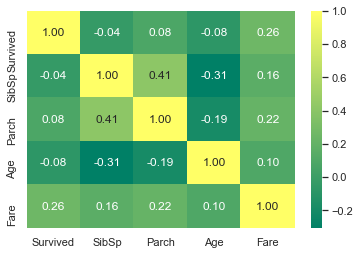

In [869]:
#Plot the correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
corr_numeric = sns.heatmap(df_train[["Survived","SibSp","Parch","Age","Fare"]].corr(),
                           annot=True, fmt = ".2f", cmap = "summer")

From the table, we can get the highest correlation between Pclass and Fare for our targeting data (Survived column). However, Fare column more correlates with Pclass, Sibsp and Parch columns.

In [870]:
#We can obtain this information using "stats" module in the "scipy" library.
from scipy import stats

In [871]:
#Pclass VS Survived
pearson_coef, p_value = stats.pearsonr(df_train['Pclass'], df_train['Survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is -0.33848103596101514  with a P-value of P = 2.5370473879790813e-25


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Pclass and Survived is statistically significant, although the linear relationship is negative and isn't extreamly strong (~0.338)</p>

In [872]:
#Fare VS Survived
pearson_coef, p_value = stats.pearsonr(df_train['Fare'], df_train['Survived'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.25730652238496243  with a P-value of P = 6.120189341917992e-15


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between Fare and Survived is statistically significant, although the linear relationship is positive and isn't extreamly strong (~0.257)</p>

Features are highly correlated with each other and dependent to each other. The highest correlation between featrues is <b>0.549500</b> in training set and <b>0.5771747</b> in test set (between Fare and Pclass). The other features are also highly correlated. There are 9 correlation in training set and 6 correlation in test set that are higher than <b>0.1</b>  

In [873]:
# Training set high correlations
df_train_corr = df_train.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

corr = df_train_corr_nd['Correlation Coefficient'] > 0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.549500
8,Parch,SibSp,0.414838
10,Pclass,Age,0.369226
12,Survived,Pclass,0.338481
14,Age,SibSp,0.308247
16,Survived,Fare,0.257307
18,Fare,Parch,0.216225
20,Age,Parch,0.189119
22,SibSp,Fare,0.159651


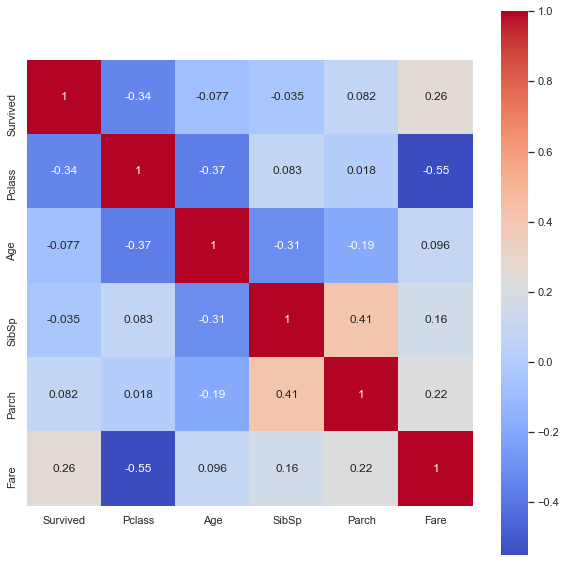

In [874]:
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(df_train.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='coolwarm')

In [875]:
# Test set high correlations
df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

corr = df_test_corr_nd['Correlation Coefficient'] > 0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.577147
8,Pclass,Age,0.492143
10,Fare,Age,0.337932
12,Parch,SibSp,0.306895
14,Parch,Fare,0.230046
16,Fare,SibSp,0.171539


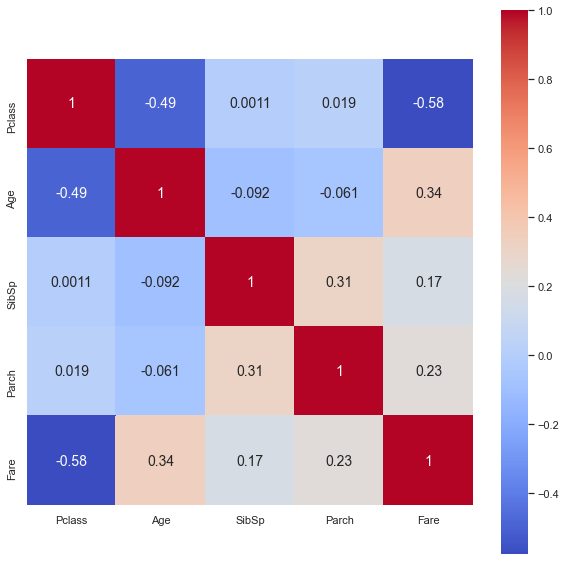

In [876]:
fig, axs = plt.subplots(figsize=(10, 10))
sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

<h2>1.3 Evaluating for Missing Data</h2>
<img 
src= "https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733">

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data. Count missing values in each column using a for loop in Python, we can quickly figure out the number of missing values in each column.

In [877]:
#Counting the missing value in Training Data
missing_data = df_train.isnull()
missing_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


"True" stands for missing value, while "False" stands for not missing value.

In [878]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

PassengerId
False    891
Name: PassengerId, dtype: int64

Survived
False    891
Name: Survived, dtype: int64

Pclass
False    891
Name: Pclass, dtype: int64

Name
False    891
Name: Name, dtype: int64

Sex
False    891
Name: Sex, dtype: int64

Age
False    714
True     177
Name: Age, dtype: int64

SibSp
False    891
Name: SibSp, dtype: int64

Parch
False    891
Name: Parch, dtype: int64

Ticket
False    891
Name: Ticket, dtype: int64

Fare
False    891
Name: Fare, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [879]:
#Counting the missing value in Training Data
missing_data2 = df_test.isnull()
missing_data2.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


"True" stands for missing value, while "False" stands for not missing value.

In [880]:
for column in missing_data2.columns.values.tolist():
    print(column)
    print (missing_data2[column].value_counts())
    print("") 

PassengerId
False    418
Name: PassengerId, dtype: int64

Pclass
False    418
Name: Pclass, dtype: int64

Name
False    418
Name: Name, dtype: int64

Sex
False    418
Name: Sex, dtype: int64

Age
False    332
True      86
Name: Age, dtype: int64

SibSp
False    418
Name: SibSp, dtype: int64

Parch
False    418
Name: Parch, dtype: int64

Ticket
False    418
Name: Ticket, dtype: int64

Fare
False    417
True       1
Name: Fare, dtype: int64

Cabin
True     327
False     91
Name: Cabin, dtype: int64

Embarked
False    418
Name: Embarked, dtype: int64



As seen from above, some columns have missing values. The missing values are shown in both training and test dataset.

<p><b>Training set</b>: have missing values in Age, Cabin and Embarked columns.</p>
<p><b>Test set</b>: have missing values in Age, Cabin and Fare columns.</p>

The count of missing value in Age, Embarked and Fare are smaller compared to total sample, but roughly 80% of the Cabin is missing. Missing value in Age, Embarked and Fare can be filled with descriptive statistical measures but wouldn't work for Cabin.


<h3>1.3.1 Evaluating missing values in Age</h3>

There are <b>177</b> missing value for Age feature. As we know someone's age is correlated to the class of the passengers (Pclass). For filling the missing values in the Age column, we can satisfy it based on the average value of someone in the class. In order to be more accurate, we consider using the Sex feature as the second level of groupby while filling the missing Age values

In [881]:
df_group1 = df_all[['Sex','Pclass','Age']]
df_age_pclass_sex = df_group1.groupby(['Sex', 'Pclass']).mean()['Age'].round(2)
df_age_pclass_sex

Sex     Pclass
female  1         37.04
        2         27.50
        3         22.19
male    1         41.03
        2         30.82
        3         25.96
Name: Age, dtype: float64

In [882]:
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Mean age of Pclass {} {}s: {}'.format(pclass, sex, df_age_pclass_sex[sex][pclass]))
print('Mean age of all passengers: {}'.format(df_all['Age'].mean().round(2)))

#Filling the missing values in Age with the mean of Pclass and Sex groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

Mean age of Pclass 1 females: 37.04
Mean age of Pclass 1 males: 41.03
Mean age of Pclass 2 females: 27.5
Mean age of Pclass 2 males: 30.82
Mean age of Pclass 3 females: 22.19
Mean age of Pclass 3 males: 25.96
Mean age of all passengers: 29.88


In [883]:
df_all['Age'].isnull().value_counts()

False    1309
Name: Age, dtype: int64

<h3>1.3.2 Evaluating missing values in Embarked</h3>

Embarked is a categorical feature with 3 different ports. Based on the counting of the total missing values in Embarked column, we see there are only 2 missing values in the whole dataset. Due to the most passengers departed from Southampton/S, we can assume to fulfil of missing values with S  

In [884]:
#Dicovering the missing values of Embarked column
df_all[df_all['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [885]:
#Counting the total value of Embarked column
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [886]:
# Filling the missing values in Embarked with S
df_all['Embarked']= df_all['Embarked'].fillna('S')
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>1.3.3 Evaluating missing values in Fare</h3>
<img src="https://www.the-blueprints.com/blueprints-depot-restricted/ships/ships-uk/rms_titanic-45460.jpg">
Based on the correlation data, We can sum up that Fare is related to family size (Parch and SibSp) and Pclass column. As there is only one missing value, we can easily see NaN is located in the third class ticket and no family beside the passenger that is a logical choice to fill the missing value using a mean

In [887]:
#Dicovering the missing values of Fare column
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [888]:
#Filling the missing value in Fare with the median Fare of 3rd class alone passenger
fare_nan = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.mean()[3][0][0].round(2) 

df_all['Fare'] = df_all['Fare'].fillna(fare_nan)

In [889]:
df_all.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>1.3.4 Evaluating missing values in Cabin</h3>

Cabin has huge of the missing data. It is little bit tricky to exploration the column. The feature itself can't be ignored completely due to some cabin might have a higher survival rates. Replaced the missing cabins with U (for unknown) and took the first letter of the cabin and did a dummy encoding using get_dummies method.

In [890]:
def process_cabin():
    global df
    #replacing missing cabins with U (for unknown)
    df_all.Cabin.fillna('U', inplace=True)
    
    #mapping each cabin value with the cabin letter
    df_all['Cabin'] = df_all['Cabin'].map(lambda c: c[0])
    
    #dummy encoding
    cabin_dummies = pd.get_dummies(df_all['Cabin'],prefix='Cabin')
    df = pd.concat([df_all, cabin_dummies], axis=1)
    
    df.drop('Cabin', axis=1, inplace=True)
    #status ('cabin')
    return df

In [891]:
df_all = process_cabin()

In [892]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,0,0,0,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,1,0,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,0,0,0,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,0,0,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,0,0,0,0,0,0,1


<h2>1.4 Target Distribution in Features</h2>
Every features has at least one class with high mortality rate. The classes are very helpful to predict the passenger is a survivor or victim
<ol>
    <li><p>Passengers boarded from <b>Southampton</b> has a lower survival rate unlike other ports. More than half of the passengers boarded from <b>Cherbourg</b> had survived. This observation could be related to <b>Pclass</b> feature.</p></li>
    <li><p><b>Parch</b> and <b>SibSp</b> features show that passengers with only one family member has a higher survival rate.</p></li>
</ol>


In [893]:
survived = df_train['Survived'].value_counts()[1]
not_survived = df_train['Survived'].value_counts()[0]
survived_per = survived / df_train.shape[0] * 100
not_survived_per = not_survived / df_train.shape[0] * 100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


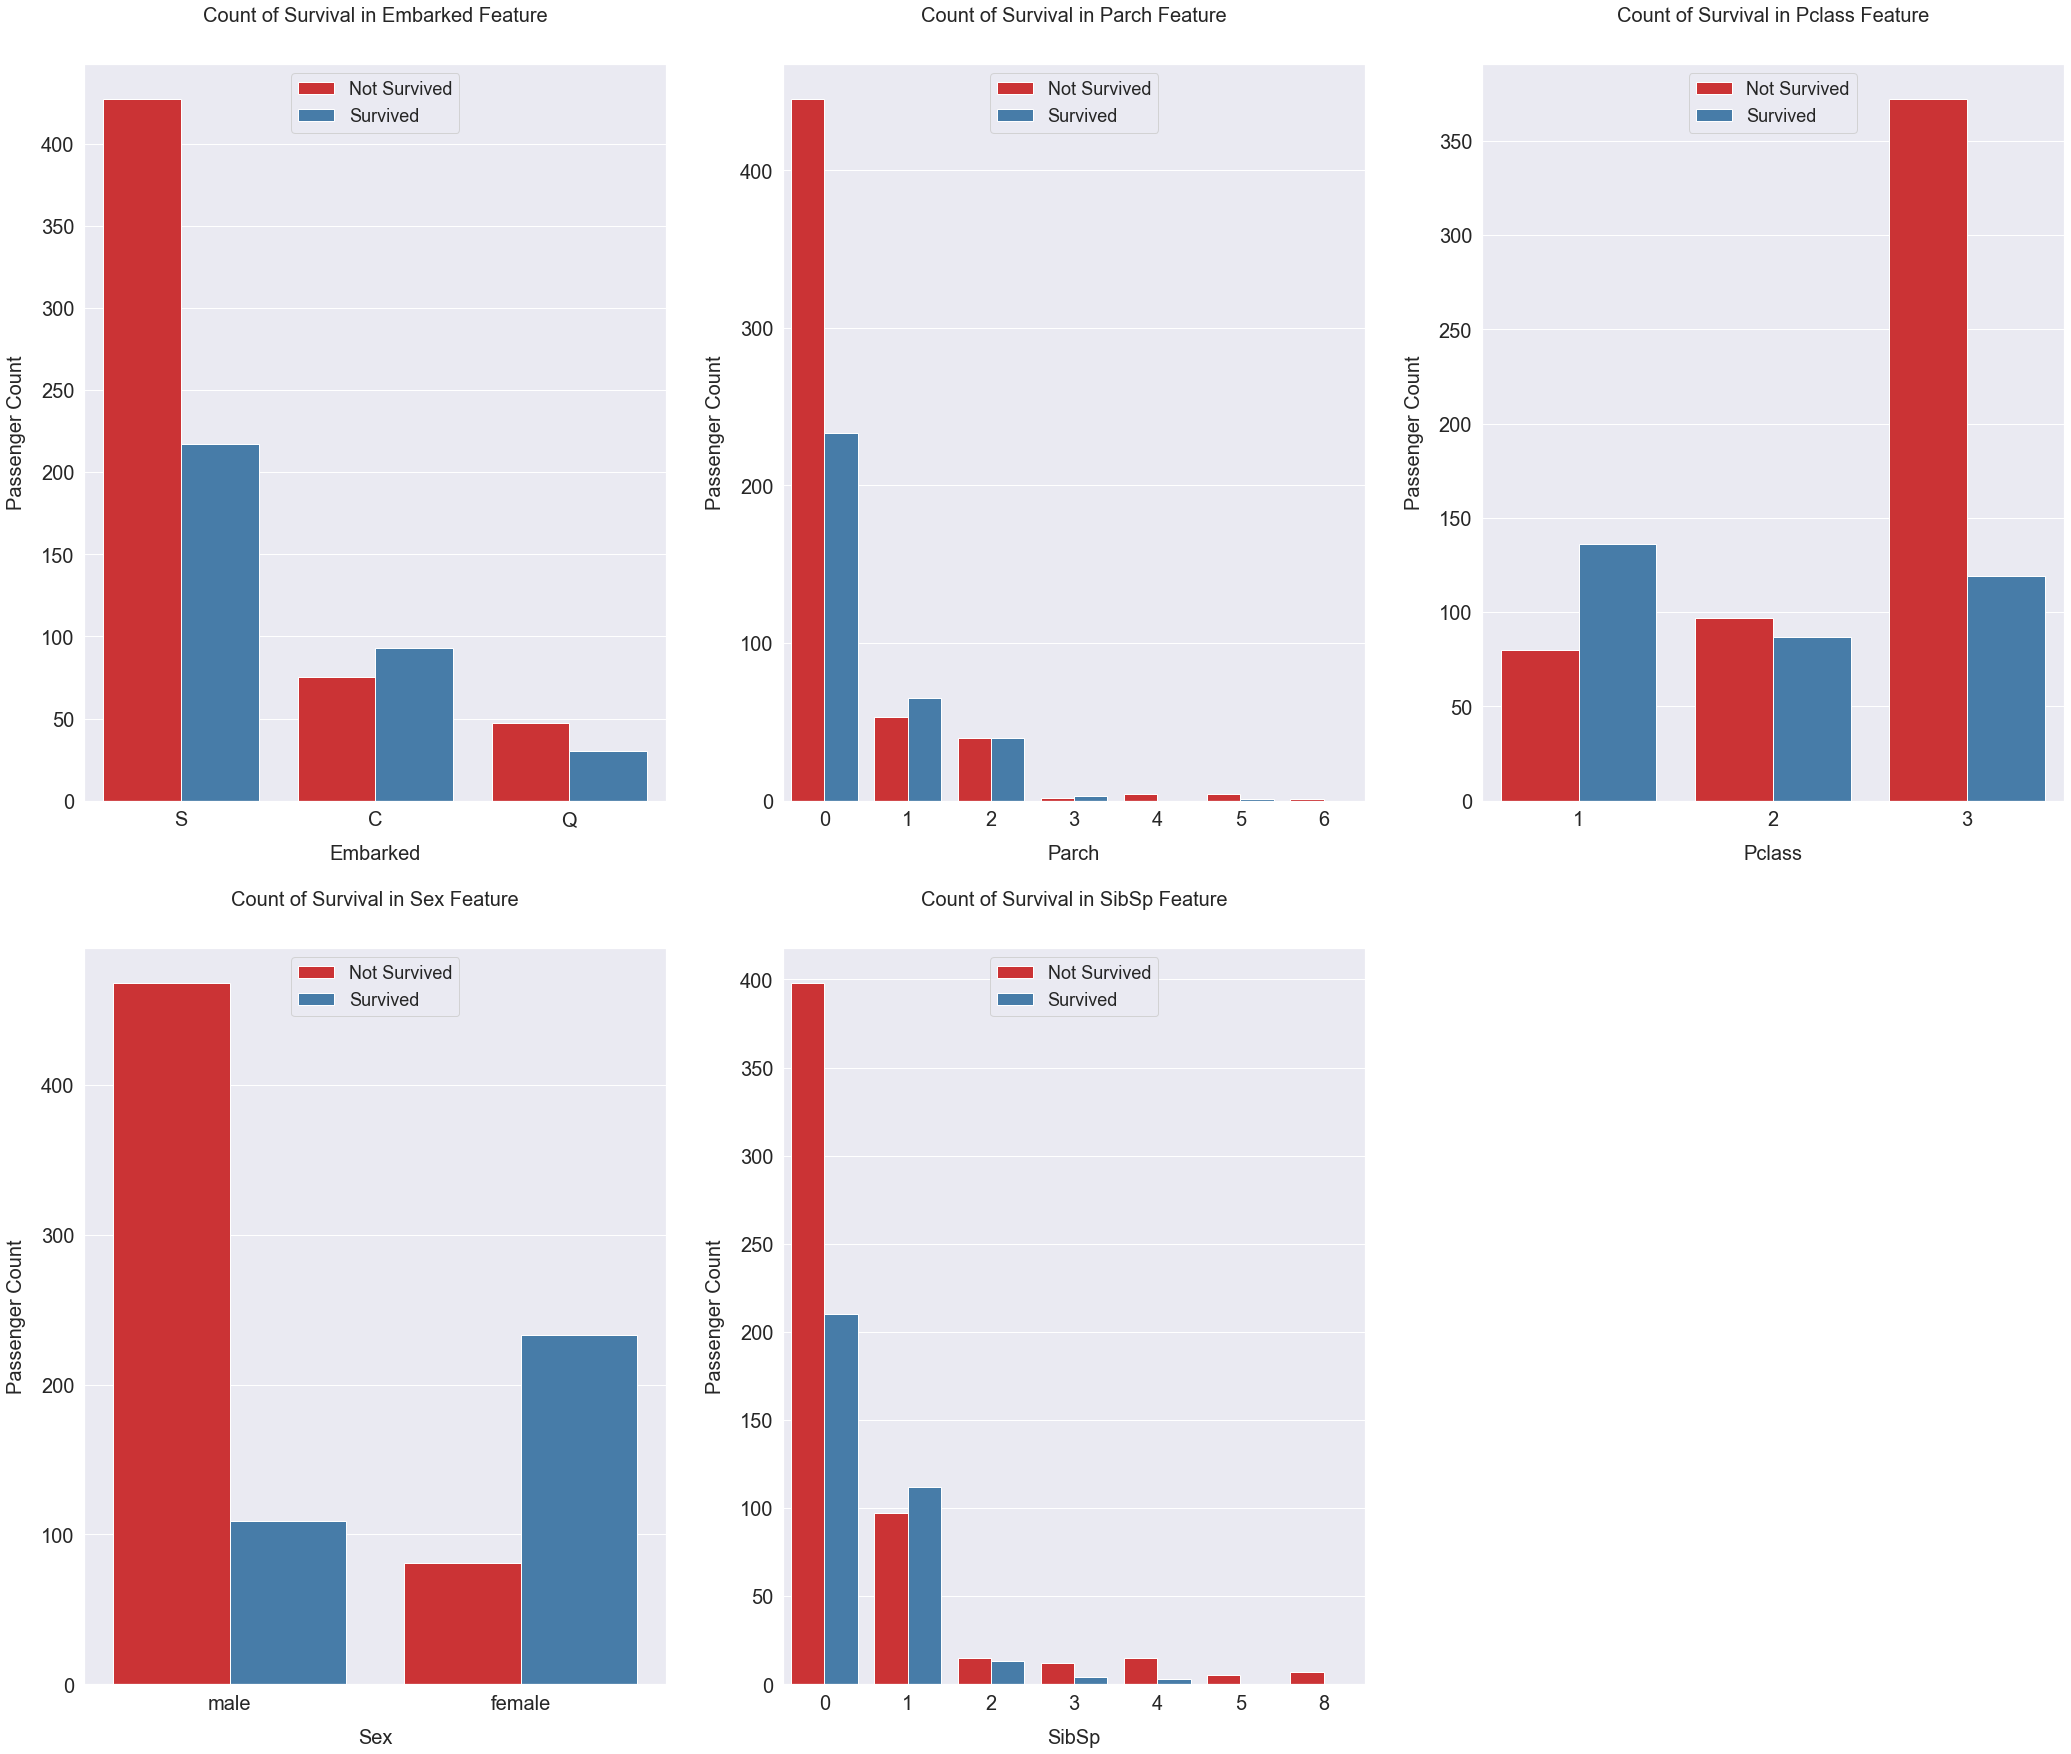

In [894]:
ftrs = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20,20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(ftrs,1):
    plt.subplot(2,3,i)
    sns.countplot(x=feature, hue='Survived', data=df_train, palette="Set1")

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size':18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)
plt.show()


<p>3. In distribution of <b>Fare</b> feature, the survival rate is higher on the end of distribution. It is mean that the class with the highest cost are positive for the passenger life.</p>

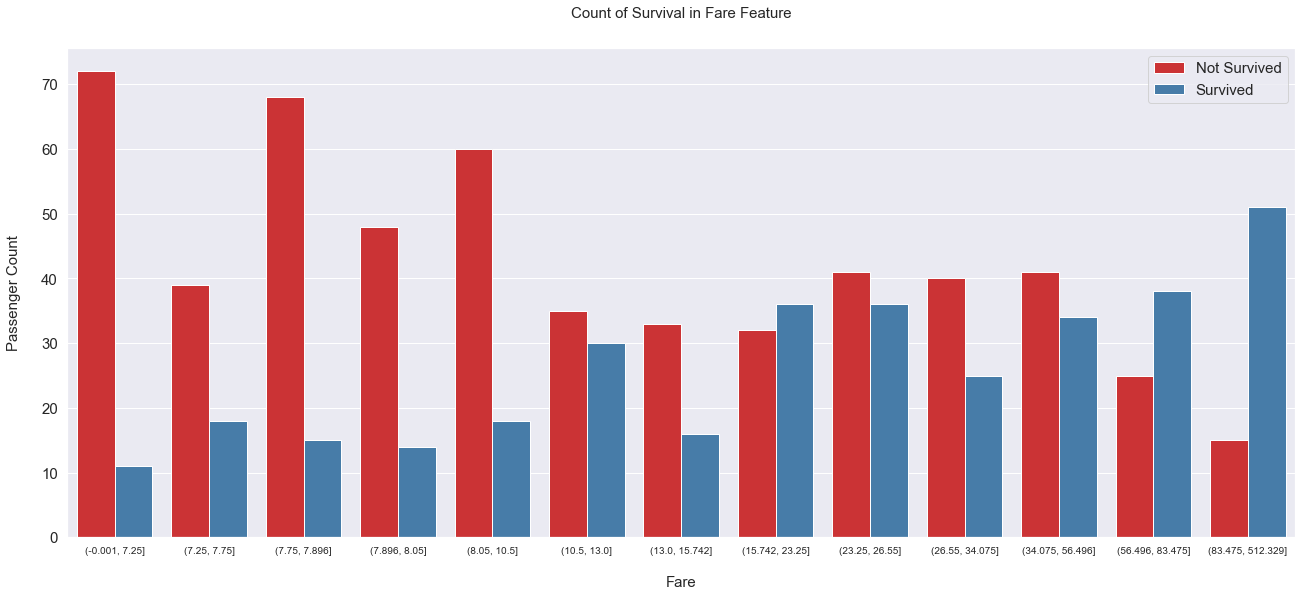

In [895]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all, palette="Set1")

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':15})
plt.title('Count of Survival in {} Feature'. format('Fare'), size=15, y=1.05)
plt.show()

<p>4. The distribution of <b>Age</b> looks like different between in the survived and not survived.Certainly, there is a peak appropriate to young passengers, that have survived. The passengers between 60-80 have less survived. So, even if "Age" is not correlated with "Survived", we can see that there are age categories of passengers that of having more or less chance to survive.</p>

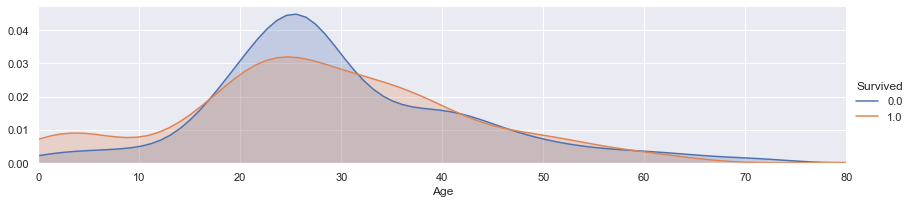

In [896]:
fig = sns.FacetGrid(df_all, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, df_all['Age'].max()))
fig.add_legend()

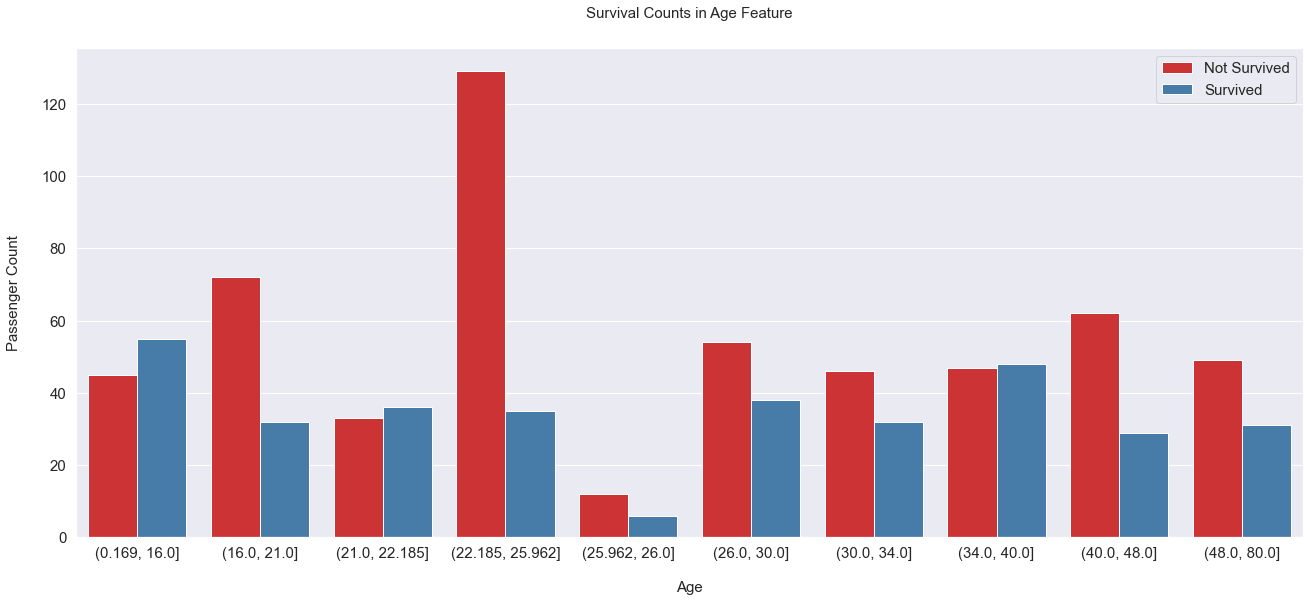

In [897]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all, palette="Set1")

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

<h2>1.5 Conclusion</h2>
The exploratory data analysis tried to find some insight into the dataset. The analysis has done with many visualizations of each component and filled the void of missing value. So, the next section is feature engineering to find out some meaningful insight for improving the accuracy of machine learning. There are components that we built up again such as title features are created from the <b>Title</b> prefix in the names, <b>Family-size</b> is created by adding Parch and SibSp features and so on. This relationship can be used to create new features with feature transformation. <b>Target encoding</b> could be very useful as well because of the high correlations with the <b>Survived</b> feature.

<h1>2. Feature Engineering</h1>

<h2>2.1 Name</h2>
We can assume that people's title influences how they are treated. In our case, we have several titles (like Mr, Mrs, Miss, Master etc ), but only some of them are shared by a significant number of people. Accordingly, it would be interesting if we could group some of the titles and simplify our analysis.

If you look at the dataset, they all have the same pattern, which is:
[Lastname], [Position]. [Firstname] so that we can just take his position by taking the words after "," (comma) and before "." (point). The split () function will split sentences into several words with certain keywords, and can be taken with the index []

Let's analyse the 'Name' and see if we can find a sensible way to group them. Then, we test our new groups and, if it works in an acceptable way, we keep it. For now, optimization will not be a goal. The focus is on getting something that can improve our current situation.

In [898]:
df_all['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [899]:
title = [i.split(",")[1].split(".")[0].strip() for i in df_all["Name"]]
df_all["title"] = pd.Series(title)
df_all["title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
the Countess      1
Lady              1
Jonkheer          1
Mme               1
Capt              1
Don               1
Sir               1
Name: title, dtype: int64

In [900]:
df_all.drop(labels = ["title"], axis = 1, inplace = True)

Some of those titles doesn't seem correct and they need to be replaced. <b>Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona</b> titles are replaced with <b>Miss/Mrs/Ms</b> because all of them are female. <b>Dr, Col, Major, Jonkheer, Capt, Sir, Don</b> and <b>Rev</b> titles are replaced with <b>Dr/Military/Noble/Clergy</b> because those passengers have similar characteristics. 

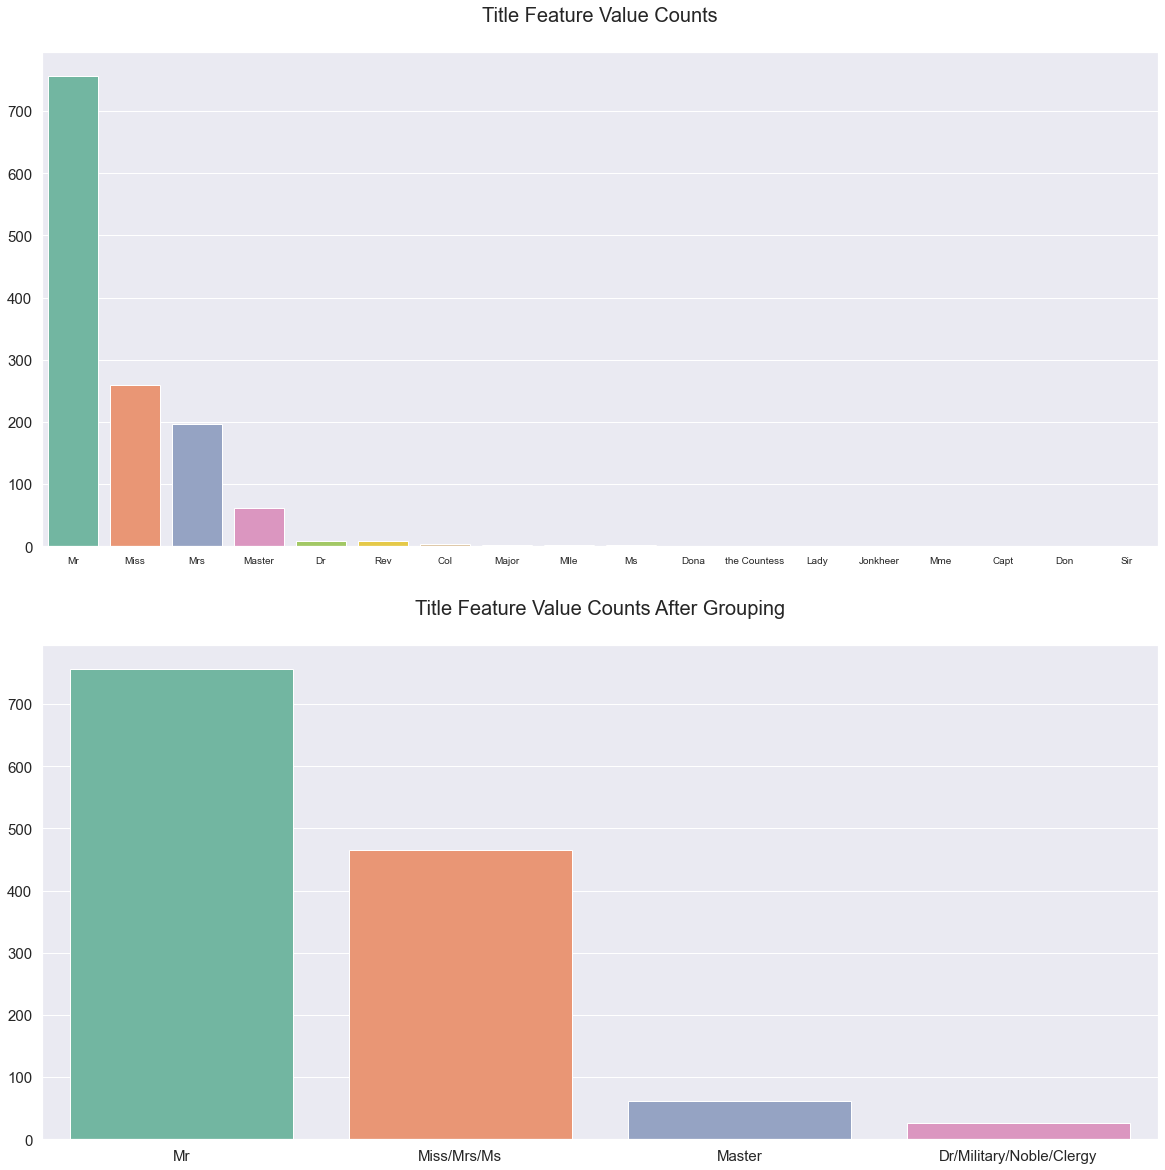

In [901]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0], palette="Set2")

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1], palette="Set2")
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

<h2>2.2 Family Size</h2>
Created some new features based on the size of the family by adding <b>SibSp, Parch</b> and <b>1</b>. <b>SibSp</b> is the count of siblings and spouse, and <b>Parch</b> is the count of parents and children. Those columns are added in order to find the total size of families. Adding <b>1</b> at the end, is the current passenger.

This analysis is under the assumption that large families are usually grouped and support together, hence they are more likely to get rescued than those were travelling alone. 
<ul>
    <li>Family Size with 1 are labeled as <b>Alone</b></li>
    <li>Family Size with 2, 3 and 4 are labeled as <b>Small</b></li>
    <li>Family Size with 5 and 6 are labeled as <b>Medium</b></li>
    <li>Family Size with 7, 8 and 11 are labeled as <b>Large</b></li>
</ul>

In [902]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 
              5: 'Medium', 6: 'Medium', 7: 'Large', 
              8: 'Large', 11: 'Large'}
df_all['Group_Family'] = df_all['Family_Size'].map(family_map)
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title,Family_Size,Group_Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,"(21.0, 22.185]",1,0,A/5 21171,"(-0.001, 7.25]",...,0,0,0,0,0,0,1,Mr,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",1,0,PC 17599,"(56.496, 83.475]",...,1,0,0,0,0,0,0,Miss/Mrs/Ms,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,"(25.962, 26.0]",0,0,STON/O2. 3101282,"(7.896, 8.05]",...,0,0,0,0,0,0,1,Miss/Mrs/Ms,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",1,0,113803,"(34.075, 56.496]",...,1,0,0,0,0,0,0,Miss/Mrs/Ms,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",0,0,373450,"(7.896, 8.05]",...,0,0,0,0,0,0,1,Mr,1,Alone


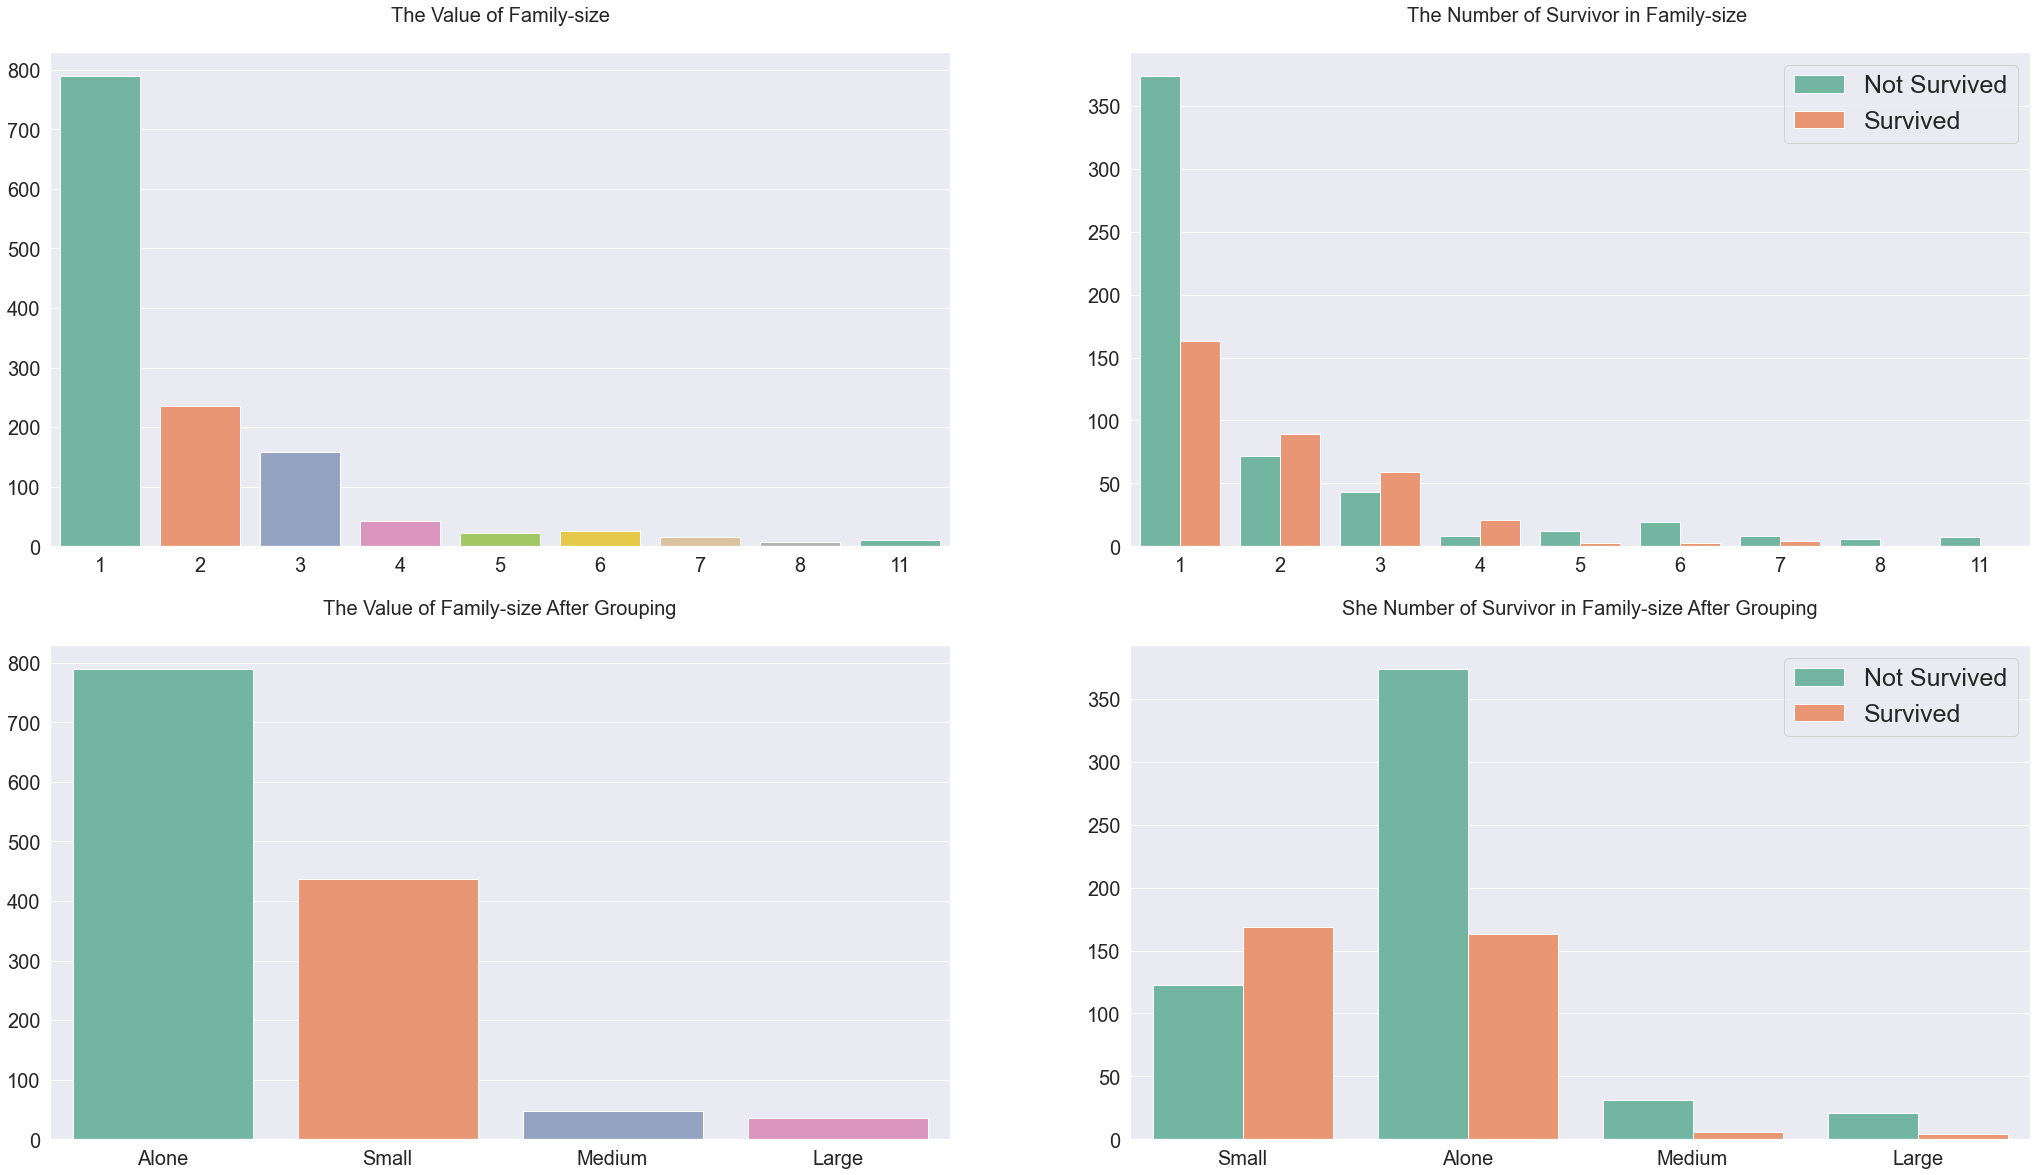

In [903]:
x1=df_all['Family_Size'].value_counts().index
y1=df_all['Family_Size'].value_counts().values

x2=df_all['Group_Family'].value_counts().index
y2=df_all['Group_Family'].value_counts().values

fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(20, 20))
plt.subplots_adjust(right=1.5)

sns.barplot(x1, y1, ax=axs[0][0],palette="Set2" )
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1], palette="Set2")

axs[0][0].set_title('The Value of Family-size', size=20, y=1.05)
axs[0][1].set_title('The Number of Survivor in Family-size ', size=20, y=1.05)

sns.barplot(x2, y2, ax=axs[1][0], palette="Set2")
sns.countplot(x='Group_Family', hue='Survived', data=df_all, ax=axs[1][1], palette="Set2")

axs[1][0].set_title('The Value of Family-size After Grouping', size=20, y=1.05)
axs[1][1].set_title('She Number of Survivor in Family-size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 25})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

<h2>2.3 Ticket</h2>
We create a new feature called <b>Ticket Frequency</b> with a combined value of the same Ticket. Why is this feature different from Group_Family? Because there could be maid, friends who use the same ticket but not counted as family.

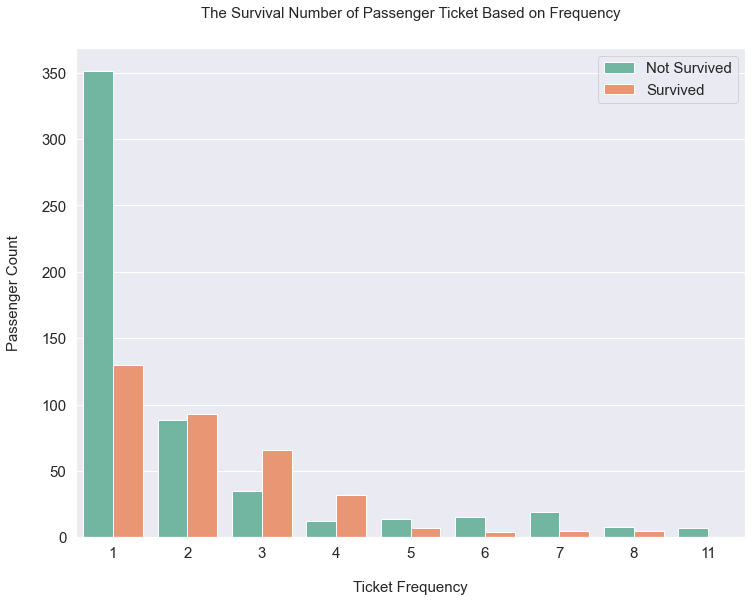

In [904]:
df_all['Ticket'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket', hue='Survived', data=df_all, palette="Set2")

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('The Survival Number of {} Based on Frequency'.format('Passenger Ticket'), size=15, y=1.05)

plt.show()

<h2>2.4 Feature Transformation: Label Encoding Non-Numerical Feature and Categorical Feature</h2>

Generating the transformation needs several approachment. Feature engineering could enhance the accuracy of the model. The first section, we need to divide the dataset into training and test dataset. The second, converting the object type (<b>Embarked</b>, <b>Sex</b>, <b>Title</b> and <b>Group_Family</b>) and category type (<b>Age</b> and <b>Fare</b>) into numerical type with <b>LabelEncoder</b>. <b>LabelEncoder</b> basically labels the classes from <b>0</b> to <b>n</b>. Third section, altering the categorical feature (<b>Pclass</b>, <b>Sex</b>, <b>Cabin</b>, <b>Embarked</b> and <b>Title</b>) into one-hot-encoded with <b>OneHotEncoder</b>. <b>Age</b> and <b>Fare</b> features are not converted because they are ordinal unlike the previous ones.

In [905]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Group_Family', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature]).astype(int)
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Group_Family']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray().astype(int)
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

C:\Users\adhi_\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<h2>2.4 Conclusion</h2>

Data that has been encoded tabulated into the table and some of the useless features after encoding are dropped. This condition aims for making the calculation in the machine learning model will be accurate.  

In [906]:
df_all_option1 = concat_df(df_train, df_test)
drop_cols = ['Embarked','Family_Size', 'Group_Family',
            'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title']

df_all_option1.drop(columns=drop_cols, inplace=True)

df_all_option1.head()

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,...,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survived,Title_1,Title_2,Title_3,Title_4
0,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0.0,0,0,0,1
1,7,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1.0,0,0,1,0
2,4,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1.0,0,0,1,0
3,7,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1.0,0,0,1,0
4,7,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0.0,0,0,0,1


In [907]:
df_all_option1.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'Fare', 'Group_Family_1', 'Group_Family_2',
       'Group_Family_3', 'Group_Family_4', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_1', 'Sex_2', 'Survived', 'Title_1', 'Title_2', 'Title_3',
       'Title_4'],
      dtype='object')

In [908]:
df_all_option1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1309 non-null   int32  
 1   Cabin_A         1309 non-null   uint8  
 2   Cabin_B         1309 non-null   uint8  
 3   Cabin_C         1309 non-null   uint8  
 4   Cabin_D         1309 non-null   uint8  
 5   Cabin_E         1309 non-null   uint8  
 6   Cabin_F         1309 non-null   uint8  
 7   Cabin_G         1309 non-null   uint8  
 8   Cabin_T         1309 non-null   uint8  
 9   Cabin_U         1309 non-null   uint8  
 10  Embarked_1      1309 non-null   int32  
 11  Embarked_2      1309 non-null   int32  
 12  Embarked_3      1309 non-null   int32  
 13  Fare            1309 non-null   int32  
 14  Group_Family_1  1309 non-null   int32  
 15  Group_Family_2  1309 non-null   int32  
 16  Group_Family_3  1309 non-null   int32  
 17  Group_Family_4  1309 non-null   i

In [910]:
df_all_option1.to_csv('TrainTest_Titanic.csv', index = False)

In [917]:
df_all_option2 = concat_df(df_train, df_test)
drop_cols = ['Embarked','Family_Size', 'Group_Family','Survived',
            'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Ticket', 'Title']

df_all_option2.drop(columns=drop_cols, inplace=True)

df_all_option2.head()

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,...,Group_Family_4,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Title_1,Title_2,Title_3,Title_4
0,2,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
1,7,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
2,4,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,7,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,7,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


<h1>3. Developing the Predictive Model with Machine Learning</h1>

<h2>The First Option of Predicting Model</h2>

Here, we split our datasets according to the previous amounts and make test and train set. To avoid overfitting event we can create validation set but that's not effective. So, we use K-Fold approaches and use StratifiedKFold to split the train datasets into 10 (by default).

In [911]:
dataset=pd.read_csv('TrainTest_Titanic.csv')

In [912]:
dataset.head()

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,...,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Survived,Title_1,Title_2,Title_3,Title_4
0,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0.0,0,0,0,1
1,7,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1.0,0,0,1,0
2,4,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1.0,0,0,1,0
3,7,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1.0,0,0,1,0
4,7,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0.0,0,0,0,1


In [840]:
# Separate train dataset and test dataset
train = dataset[:len(df_train)]
test = dataset[len(df_train):]
test.drop(labels=["Survived"],axis = 1,inplace = True)

# Separate train features and label 
Y_train = train["Survived"].astype(int)
X_train = train.drop(labels = ["Survived"],axis = 1)

# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

# Show the shape of the training and test dataset
print('X_train shape: {}'.format(X_train.shape))
print('Y_train shape: {}'.format(Y_train.shape))
print('X_test shape: {}'.format(test.shape))

X_train shape: (891, 27)
Y_train shape: (891,)
X_test shape: (418, 27)


C:\Users\adhi_\miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [823]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train, Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 2160 out of 2160 | elapsed:  2.8min finished


0.840661672908864

In [824]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   56.1s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.7min finished


0.8361797752808989

In [825]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.0s


[LibLinear]

[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    6.4s finished


0.828302122347066

In [826]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    0.2s finished


0.826067415730337

In [827]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   34.5s finished


0.8316479400749064

In [833]:
#about 84%
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best)],
                           voting='soft', n_jobs = 4)

# 82.97%
#VotingPredictor = VotingClassifier(estimators =
                           #[ ('rfc', RFC_best), 
                            # ('svc', SVMC_best),
                             #('gbc', GBC_best),
                             #('lda', LDA_best),
                             #('lrm', LRM_best)],
                            #voting='soft', n_jobs = 4)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.8        0.85393258 0.74157303 0.88764045 0.8988764  0.83146067
 0.83146067 0.7752809  0.85393258 0.85393258]
83.28


In [842]:
submission = pd.DataFrame({
        "PassengerId":TestPassengerID,
        "Survived": VotingPredictor.predict(test)
    })
submission.to_csv('submission_correyoption1.csv', index=False)

In [843]:
df_hasil = pd.read_csv('submission_correyoption1.csv')
df_hasil.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [844]:
df_hasil['Survived'].value_counts()

0    279
1    139
Name: Survived, dtype: int64

For the first option, the analysis model sent to Kaggle and reaches a score of <b>0.77990</b> which is the top <b>10%</b>

Reference:
   <ul>
    <li>https://towardsdatascience.com/kaggle-titanic-machine-learning-model-top-7-fa4523b7c40</li>
    <li>https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial/notebook</li>
    <li>https://github.com/innat/Kaggle-Play/tree/gh-pages/Titanic%20Competition</li>
   </ul>